# KR-WordRank
- 비지도학습으로 한국어 텍스트에서 키워드를 자동으로 추출해주는 라이브러리
- **주요 가정 : 단어 주변에는 단어가 등장하며, 올바른 단어는 주위의 많은 단어들과 연결되어 있다. 따라서 단어는 주위 단어들에 의하여 단어 점수가 보강(reinforced)된다.**
- [KR-WordRank Reference](https://github.com/lovit/KR-WordRank)
- [Setup]
```
pip install krwordrank
```

### 전체 파일 합치기

In [1]:
import os
os.chdir('../data/')

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm, tqdm_pandas

year = [str(x) for x in range(2018, 2022)]   # 2018 ~ 2021
df = pd.DataFrame(columns = ['year', 'fileName', 'text', 'preprocessing', 'keywords'])
df

,year,fileName,text,preprocessing,keywords


In [15]:
for y in tqdm(year):
    fileList = os.listdir('./' + y)
    for file in fileList:
        with open('./' + y + '/' + file, 'r') as f:
            text = f.read().splitlines()
        if text and text[0].strip():
            df_slice = pd.Series([y, file, text[0].strip(), 0, 0], index = df.columns)
            df = df.append(df_slice, ignore_index = True)
# df.to_csv('all_before_preprocessing_2.csv', index = False)

100%|██████████| 4/4 [00:00<00:00,  5.76it/s]


In [16]:
df.head()

,year,fileName,text,preprocessing,keywords
0,2018,한국산업인력공단 지속가능보고서(2017...,지속가능경영 보고서 목차 보고...,0,0
1,2018,LGCNS_Sustainability_Report_2017-2018.pdf.txt,- 보고서 ...,0,0
2,2018,한국국토정보공사 2017 지속가능경영보ᄀ...,지속가능경영보고서 한 국 국 토 정 보 공 사 지 속 가 능 경...,0,0
3,2018,2018 롯데건설 지속가능경영보고서.pdf.txt,롯데건설 지속가능경영보고서 보고서 개요 보고서 특징 롯데건설은 년...,0,0
4,2018,2018_NH투자증권.pdf.txt,투 자 증 권 지 속 가 능 경 영 보 고 서 서울특별시 영등포구 여의...,0,0


In [19]:
len(df)   # 2018~2021 전체 파일 개수 260개 중 24개는 빈 파일이라 제외됨

236

### 정규표현식으로 전처리

In [20]:
import re

def preprocessing_regex(text):
    
    afterText = re.sub('[^가-힣]', ' ', text)                # 한글만
    afterText = re.sub('/\r\n|\r|\n/', ' ', afterText)      # 개행문자 제거
    afterText = re.sub(' +', ' ', afterText)                # 연속된 공백 한개로
    
    return afterText

In [21]:
tqdm.pandas()

df['preprocessing'] = df['text'].progress_apply(preprocessing_regex)
df.head()

/opt/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 236/236 [00:03<00:00, 67.64it/s]


,year,fileName,text,preprocessing,keywords
0,2018,한국산업인력공단 지속가능보고서(2017...,지속가능경영 보고서 목차 보고...,지속가능경영 보고서 목차 보고서개요 기관소개 지속가능경영 소개 경영추진체계 거버넌스...,0
1,2018,LGCNS_Sustainability_Report_2017-2018.pdf.txt,- 보고서 ...,보고서 개요 본 보고서는 가 발간하는 두 번째 보고서로서 의 지속가능경영 전략을 ...,0
2,2018,한국국토정보공사 2017 지속가능경영보ᄀ...,지속가능경영보고서 한 국 국 토 정 보 공 사 지 속 가 능 경...,지속가능경영보고서 한 국 국 토 정 보 공 사 지 속 가 능 경 영 보 고 서 사 ...,0
3,2018,2018 롯데건설 지속가능경영보고서.pdf.txt,롯데건설 지속가능경영보고서 보고서 개요 보고서 특징 롯데건설은 년...,롯데건설 지속가능경영보고서 보고서 개요 보고서 특징 롯데건설은 년 이후 매년 지속가...,0
4,2018,2018_NH투자증권.pdf.txt,투 자 증 권 지 속 가 능 경 영 보 고 서 서울특별시 영등포구 여의...,투 자 증 권 지 속 가 능 경 영 보 고 서 서울특별시 영등포구 여의대로 투자증권...,0


In [22]:
df.to_csv('all_before_extracting_keywords_2.csv', index = False)

In [23]:
df.text[0][:500]

'지속가능경영 보고서   목차                             보고서개요                 기관소개  지속가능경영 소개  경영추진체계 거버넌스 윤리경영 이해관계자 소통 중대성평가  청년 일자리지원 사업  중소기업 인적자원 개발지원 실력중심 사회조성 기반 마련 임직원이 행복한 일터 고객과 함께하는    경영 지역사회 상생협력  동반성장 친환경 실천문화            공단 소속기관 위치                     대원칙                                                                   전 국민의 평생고용역량을 키우는    .      파트너   한국산업인력공단에  관심과 애정으로 응원해주신 여러분들께 감사합니다.   지속되는 경제 불황 및 고용 없는 성장으로 인해 질 좋은 일자리 부족  청년  실업 등 많은 사회적 문제가 발생하고 있습니다. 또한  차 산업혁명으로 인한  인공지능  로봇 기술의 '

In [24]:
df.preprocessing[0][:500]

'지속가능경영 보고서 목차 보고서개요 기관소개 지속가능경영 소개 경영추진체계 거버넌스 윤리경영 이해관계자 소통 중대성평가 청년 일자리지원 사업 중소기업 인적자원 개발지원 실력중심 사회조성 기반 마련 임직원이 행복한 일터 고객과 함께하는 경영 지역사회 상생협력 동반성장 친환경 실천문화 공단 소속기관 위치 대원칙 전 국민의 평생고용역량을 키우는 파트너 한국산업인력공단에 관심과 애정으로 응원해주신 여러분들께 감사합니다 지속되는 경제 불황 및 고용 없는 성장으로 인해 질 좋은 일자리 부족 청년 실업 등 많은 사회적 문제가 발생하고 있습니다 또한 차 산업혁명으로 인한 인공지능 로봇 기술의 발달은 우리사회에 기회인 동시에 사람의 일자리를 대체하는 위협으로 다가오고 있습니다 공단은 전 국민의 평생고용역량을 키우는 파트너 기관으로서 본연의 사업을 통해 우리사회 일자리 부족 문제 해소에 기여하고 공공기관으로서 사회적 책임이행에 최선을 다하고 있습니다 첫째 한국산업인력공단은 우리나라 청년들의 일자리 문'

In [25]:
df.text[1][:1000]

'-                                         보고서 개요  본 보고서는       가 발간하는 두 번째 보고서로서        의 지속가능경영 전략을 소개  하고 이를 실현하기 위한 영역별 지속가능경영 활동과 성과를 중심으로 구성하였습니다.       는 중대성 평가를 통해 자사와 이해관계자에게 우선적으로 중요하다고 판단 되는 정보를 수록하고자 노력하였으며  평가 결과는 현업 유관부서와의 리뷰와 경영진  검토를 통해 최종 확정하여 보고서에 담았습니다. 또한                            비전 아래 더 나은 삶을 위한 기술  혁신적인 플 랫폼 서비스를 통해       가 고객의 비즈니스를 선도하고 미래를 어떻게 준비하고  있는지를 알 수 있도록 하였습니다.       는 경제  사회  환경적 가치를 균형 있게 공 개하고자 하였으며  전사적으로 지속가능경영을 추진하고 있습니다.  보고서 기준 본 보고서는 국제 지속가능경영보고서 지침인              에 따라 작성하였습니다.    추가적으로         지표 반영  재무적 성과의 경우 한국채택국제회계기준인  -     에 따라 보고하였습니다. 보고범위       가 운영하고 있는 모든 국내 사업장의 경제  사회  환경적 활동과 성과 보고기간 회계연도     년  월  일       년   월   일까지의 데이터  주요한 경영활동 사항에  대해서는     년 상반기 활동도 포함하였습니다. 일부 정량 데이터의 경우 최근  개  년도 자료를 보고하여 연도별 추이를 파악할 수 있도록 하였습니다. 보고서 검증 본 보고서는 자가검증     -        를 거쳤으며  제  자 외부 검증기관의 검토를 받지  않았습니다.       는 향후 보고 기준의 객관성과 정확성을 확보하기 위한 외부 검증 을 추진할 계획입니다. 보고서 문의처        지속가능경영보고서는 홈페이지    .       .    에 게재되어 있으며    추가적으로 궁금한 사항은 다음 연락처로 문의

In [26]:
df.preprocessing[1][:1000]

' 보고서 개요 본 보고서는 가 발간하는 두 번째 보고서로서 의 지속가능경영 전략을 소개 하고 이를 실현하기 위한 영역별 지속가능경영 활동과 성과를 중심으로 구성하였습니다 는 중대성 평가를 통해 자사와 이해관계자에게 우선적으로 중요하다고 판단 되는 정보를 수록하고자 노력하였으며 평가 결과는 현업 유관부서와의 리뷰와 경영진 검토를 통해 최종 확정하여 보고서에 담았습니다 또한 비전 아래 더 나은 삶을 위한 기술 혁신적인 플 랫폼 서비스를 통해 가 고객의 비즈니스를 선도하고 미래를 어떻게 준비하고 있는지를 알 수 있도록 하였습니다 는 경제 사회 환경적 가치를 균형 있게 공 개하고자 하였으며 전사적으로 지속가능경영을 추진하고 있습니다 보고서 기준 본 보고서는 국제 지속가능경영보고서 지침인 에 따라 작성하였습니다 추가적으로 지표 반영 재무적 성과의 경우 한국채택국제회계기준인 에 따라 보고하였습니다 보고범위 가 운영하고 있는 모든 국내 사업장의 경제 사회 환경적 활동과 성과 보고기간 회계연도 년 월 일 년 월 일까지의 데이터 주요한 경영활동 사항에 대해서는 년 상반기 활동도 포함하였습니다 일부 정량 데이터의 경우 최근 개 년도 자료를 보고하여 연도별 추이를 파악할 수 있도록 하였습니다 보고서 검증 본 보고서는 자가검증 를 거쳤으며 제 자 외부 검증기관의 검토를 받지 않았습니다 는 향후 보고 기준의 객관성과 정확성을 확보하기 위한 외부 검증 을 추진할 계획입니다 보고서 문의처 지속가능경영보고서는 홈페이지 에 게재되어 있으며 추가적으로 궁금한 사항은 다음 연락처로 문의해 주시기 바랍니다 서울시 강서구 마곡중앙 로 동 업무팀 이호석 박선숙 기업개요 지배구조 추진방향 이해관계자 커뮤니케이션 중대성평가 비전 기술전략 주요 서비스 솔루션 서비스 기본역량 컨설팅 데이터센터 혁신적 플랫폼 및 서비스 빅데이터 클라우드 블록체인 고객 비즈니스 경쟁력 제고 스마트팩토리 스마트물류 통신 미디어 트랜잭션 보다 나은 삶을 위한 변화 선도 디지털 금융 에너지 지능형 정부 스마트교통 스마트시티 고객

### 키워드 추출

In [52]:
from krwordrank.word import KRWordRank
from krwordrank.hangle import normalize      # 숫자, 영어 포함 여부
from krwordrank.word import summarize_with_keywords
import numpy as np

def extract_keywords(text):
    error_cnt = 0
    try:
        min_count = 3       # 단어의 최소 출현 빈도수 (그래프 생성 시) [5, 3]
        max_length = 30     # 단어의 최대 길이 [10, 30]
        verbose = False     # [True, False]
        wordrank_extractor = KRWordRank(min_count, max_length, verbose)

        beta = 0.85         # PageRank의 decaying factor beta
        max_iter = 30       # [10, 30]

        text = normalize(text, english = False, number = False).split(' ')          # wordrank_extractor.extract() 함수를 쓰려면 text가 List 형태여야 함
        keywords, rank, graph = wordrank_extractor.extract(text, beta, max_iter)

    #     stopwords = {'대한','의견','단어'}
    #     keywords = summarize_with_keywords(texts, min_count = 3, max_length = 30, beta = 0.85, max_iter = 30, stopwords = stopwords, verbose = True)
        keywords = summarize_with_keywords(text)    # with default arguments
        result = sorted(keywords.items(), key = lambda x:x[1], reverse = True)

#         return [result[x][0] for x in range(len(result))]   # 단어만
        return result                                         # 단어 + 점수
    
    except:
        error_cnt += 1
        print(error_cnt)
        
        return np.nan

In [57]:
tqdm.pandas()

df['keywords'] = df['preprocessing'].progress_apply(extract_keywords)
df.head()

/opt/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 236/236 [01:45<00:00,  2.24it/s]


,year,fileName,text,preprocessing,keywords
0,2018,한국산업인력공단 지속가능보고서(2017...,지속가능경영 보고서 목차 보고...,지속가능경영 보고서 목차 보고서개요 기관소개 지속가능경영 소개 경영추진체계 거버넌스...,"[(공단, 5.850995857529506), (운영, 4.5339026049113..."
1,2018,LGCNS_Sustainability_Report_2017-2018.pdf.txt,- 보고서 ...,보고서 개요 본 보고서는 가 발간하는 두 번째 보고서로서 의 지속가능경영 전략을 ...,"[(있습니, 5.463396480354177), (기반, 4.889596115914..."
2,2018,한국국토정보공사 2017 지속가능경영보ᄀ...,지속가능경영보고서 한 국 국 토 정 보 공 사 지 속 가 능 경...,지속가능경영보고서 한 국 국 토 정 보 공 사 지 속 가 능 경 영 보 고 서 사 ...,"[(공간, 7.2719381387882), (있습니, 6.21467661692869..."
3,2018,2018 롯데건설 지속가능경영보고서.pdf.txt,롯데건설 지속가능경영보고서 보고서 개요 보고서 특징 롯데건설은 년...,롯데건설 지속가능경영보고서 보고서 개요 보고서 특징 롯데건설은 년 이후 매년 지속가...,"[(롯데, 6.182749209975904), (사업, 6.0840699046753..."
4,2018,2018_NH투자증권.pdf.txt,투 자 증 권 지 속 가 능 경 영 보 고 서 서울특별시 영등포구 여의...,투 자 증 권 지 속 가 능 경 영 보 고 서 서울특별시 영등포구 여의대로 투자증권...,"[(투자, 7.9609000109563555), (고객, 7.159068560480..."


In [59]:
df.to_csv('all_after_keywords_2.csv', index = False)

### 중복 키워드 확인

In [75]:
keyword_counter = {}

for keywords in df.keywords:
    words, ranks = zip(*keywords)
    for word in words:
        keyword_counter[word] = keyword_counter.get(word, 0) + 1

common_keywords = {word for word, count in keyword_counter.items() if count == len(df)}    # 모든 보고서에 등장하는 키워드
len(common_keywords)

0

In [76]:
len(keyword_counter)

1784

In [77]:
keyword_counter = sorted(keyword_counter.items(), key = lambda x:x[1], reverse = True)
keyword_counter = list(keyword_counter)
keyword_counter[:10]

[('지속', 234),
 ('사회', 234),
 ('보고', 233),
 ('운영', 232),
 ('사업', 232),
 ('프로', 230),
 ('지원', 228),
 ('관리', 228),
 ('활동', 227),
 ('노력', 226)]

### 키워드 EDA

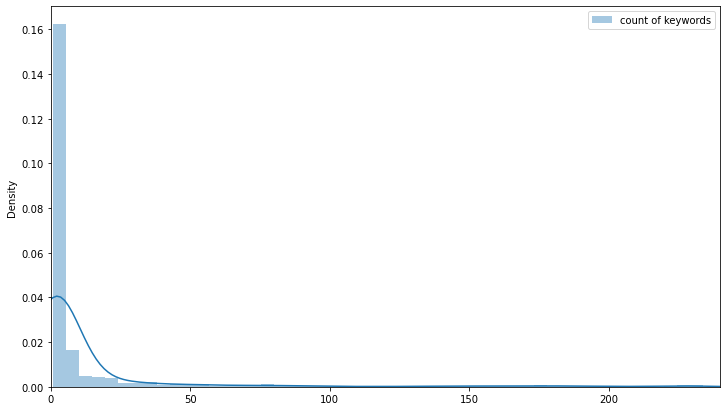

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 7))
sns.distplot(list(zip(*keyword_counter))[1], label = "count of keywords")
plt.xlim(0, 240)
plt.legend()

In [91]:
df_keyword_cnt = pd.DataFrame(list(zip(*keyword_counter))[1], columns = ['count'])
df_keyword_cnt['count'].describe()

count    1784.000000
mean       13.173767
std        36.166470
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       234.000000
Name: count, dtype: float64